In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline
from tqdm import tqdm
from scipy.special import erf

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [3]:
def gen_int(x, m, s):
    return s*erf((x-m)/(np.sqrt(2)*s))/(2*np.abs(s))

def integral(x1, x2, m, v):
    s = np.sqrt(v)
    return gen_int(x2, m, s) - gen_int(x1, m, s)

In [4]:
method = 'lang'

In [5]:
ks = [0.5, 1.0, 1.5, 2.0, 2.5]
bs = [0.1, 0.3, 0.7, 1.0, 1.2]
Ds = [0.1, 0.5, 1.0, 1.5, 5.0]
sqrtbks = []

In [117]:
num_particles = 200
max_t = 10
dt = 0.01
ts = np.arange(0, max_t, dt)
D, k, beta = 1.04, 0.87, 2.43
x0 = 3
U = harmonic_potential(k=k)

num_repetitions = 50
num_steps = int(max_t/dt)
xs = np.zeros(shape=(num_repetitions, num_steps, num_particles))
for i in range(num_repetitions):
    ts, xs[i] = simulate(U, method=method, num_particles=num_particles, max_t=max_t, dt=dt, KT=1/beta, x0=3, D=D)

100%|██████████| 999/999 [00:00<00:00, 1425.13it/s]


In [118]:
bins = np.arange(-5, 5, 0.1)
num_bins = len(bins)-1

In [142]:
m = x0 * np.exp(-D*beta*k*ts)
v = 1/(beta*k)*(1-np.exp(-2*D*beta*k*ts))

hist = []
mean_x = []
var_x = []
for i in range(num_repetitions):
    hist.append(np.array([np.histogram(x, bins)[0] for x in xs[i][1:]]))
hist = np.array(hist)
mean_hist = np.mean(hist, axis=0)

# the reason for [1:] in the means and stdevs is that at the first time step the distribution is a delta function,
# and thus it's histogram can't be plotted
expected = num_particles * np.array([[integral(bins[j], bins[j+1], mean, var) for j, _ in enumerate(bins[:-1])]
                                     for mean, var in zip(m[1:], s[1:])])


In [187]:
steps = int(max_t/dt)
mean_x = np.zeros(steps)
var_x = np.zeros(steps)
for i in range(steps):
    mean_x[i] = np.mean(xs[:,i].flatten())
    var_x[i] = np.var(xs[:,i].flatten())

100 100.0%


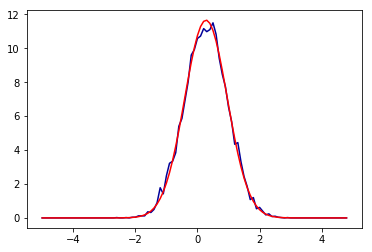

In [143]:
i = 100
plt.plot(bins[:-1], mean_hist[i], color='#000099')
plt.plot(bins[:-1], expected[i], color='red')
fit = [1 if (e-np.sqrt(e) <= h <= e+np.sqrt(e)) else 0 for h, e in zip(mean_hist[i], expected[i])]
print('{} {:0.1f}%'.format(i, np.sum(fit)/num_bins*100))

In [188]:
with open('../data/harmonic_stats_test.data', 'w') as f:
    f.write('# Num repetitions: {}; D={},k={},beta={}\n'.format(num_repetitions, D, k, beta))
    for i, t in enumerate(ts[1:]):
        fit = [1 if (e-np.sqrt(e) <= h <= e+np.sqrt(e)) else 0 for h, e in zip(mean_hist[i], expected[i])]
        p = np.sum(fit)/num_bins*100
        f.write('{} {} {} {}\n'.format(t, mean_x[i], var_x[i], p))

In [189]:
beta*k*D

2.198664

In [191]:
beta*k, D

(2.1141, 1.04)